In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/validation.csv
/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv
/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/test.csv


In [4]:
train_csv=pd.read_csv("/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv")

In [5]:
train_csv.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [4]:
train_csv["article"][0]

"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained 

In [6]:
train_csv["highlights"][0]

'Bishop John Folda, of North Dakota, is taking time off after being diagnosed .\nHe contracted the infection through contaminated food in Italy .\nChurch members in Fargo, Grand Forks and Jamestown could have been exposed .'

In [11]:
validation_csv=pd.read_csv("/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/validation.csv")

In [12]:
test_csv=pd.read_csv("/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/test.csv")

In [13]:
validation_csv.head()

,id,article,highlights
0,61df4979ac5fcc2b71be46ed6fe5a46ce7f071c3,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,21c0bd69b7e7df285c3d1b1cf56d4da925980a68,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,56f340189cd128194b2e7cb8c26bb900e3a848b4,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,00a665151b89a53e5a08a389df8334f4106494c2,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,9f6fbd3c497c4d28879bebebea220884f03eb41a,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...


In [14]:
test_csv.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


## Data Preprocessing

In [15]:
train_data=train_csv.drop(['id'],axis=1)
train_data=train_data.reset_index(drop=True)

validation_data=validation_csv.drop(['id'],axis=1)
validation_data=validation_data.reset_index(drop=True)

test_data=test_csv.drop(['id'],axis=1)
test_data=test_data.reset_index(drop=True)

In [16]:
train_data.head()

,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [17]:
validation_data.head()

,article,highlights
0,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...


In [18]:
test_data.head()

,article,highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


## Adding Contraction and Removing stopwords from the dataset

In [19]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [20]:
import re
import string
def clean_data(data,remove_stopwords):
    
    data=data.lower()
    data=data.split()
    tmp=[]
    for word in data:
        if word in contractions:
            tmp.append(contractions[word])
        else:
            tmp.append(word)
    data=' '.join(tmp)
    
    data = re.sub(r'https?:\/\/.*[\r\n]*', '', data, flags=re.MULTILINE)
    data = re.sub(r'\<a href', ' ', data)
    data = re.sub(r'&amp;', '', data) 
    data = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', data) #replace these characters with " " blank
    data = re.sub(r'<br />', ' ', data)
    data = re.sub(r'\'', ' ', data)
    
    if remove_stopwords:
        data=data.split()
        stops=set(stopwords.words('english'))
        data=[ word for word in data if word not in stops]
        data=' '.join(data)
        
    return data
    

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

clean_summaries=[]

for summary in train_data.highlights:
    clean_summaries.append(clean_data(summary,remove_stopwords=False))

print("Train highlight is cleaned")

clean_texts=[]

for text in train_data.article:
    clean_texts.append(clean_data(text,remove_stopwords=True))
    
print("Cleaning Train text is done")    
    

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Train highlight is cleaned
Cleaning Train text is done


In [22]:
del train_data

In [23]:
clean_df=pd.DataFrame()
clean_df['text']=clean_texts[:110000]
clean_df['summary']=clean_summaries[:110000]

In [24]:
clean_df.head()

,text,summary
0,associated press published 14 11 est 25 octobe...,bishop john folda of north dakota is taking ...
1,cnn ralph mata internal affairs lieutenant mia...,criminal complaint cop used his role to help ...
2,drunk driver killed young woman head crash che...,craig eccleston todd 27 had drunk at least t...
3,cnn breezy sweep pen president vladimir putin ...,nina dos santos says europe must be ready to a...
4,fleetwood team still 100 record sky bet league...,fleetwood top of league one after 2 0 win at s...


In [25]:
clean_df['summary'].replace('', np.nan, inplace=True)
clean_df.dropna(axis=0, inplace=True)
clean_df['summary'] = clean_df['summary'].apply(lambda x: '<sostok>' + ' ' + x + ' ' + '<eostok>') #The entire lambda function concatenates the start-of-sentence token, the original text from the 'summary' column, and the end-of-sentence token together, effectively adding these tokens at the beginning and end of each element in the 'summary' column.

In [26]:
clean_df['summary'][:3]

0    <sostok> bishop john folda  of north dakota  i...
1    <sostok> criminal complaint  cop used his role...
2    <sostok> craig eccleston todd  27  had drunk a...
Name: summary, dtype: object

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
print(tf.__version__)

2.11.0


In [28]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(clean_df["text"],clean_df["summary"],test_size=0.2,random_state=42)

In [29]:
print(len(train_x),len(test_x))

88000 22000


In [30]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(list(train_x))

# thresh: A threshold value that is used for comparison with the values (word counts) in the word frequency dictionary.
# count: A counter that keeps track of the number of words whose count is less than thresh. It is incremented whenever a word count is found to be less than thresh.
# total_count: A counter that keeps track of the total number of words (or items) in the word frequency dictionary. It is incremented for each item in the dictionary, regardless of its count.
# frequency: A variable that keeps track of the total frequency (i.e., the sum of counts) of words whose count is less than thresh. It is incremented with the value (word count) whenever a word count is found to be less than thresh.
# total_frequency: A variable that keeps track of the total frequency (i.e., the sum of counts) of all words (or items) in the word frequency dictionary. It is incremented with the value (word count) for each item in the dictionary, regardless of its count.



thresh = 4
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value


In [31]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
t_max_features = total_count-count
print('Summary Vocab: ', t_max_features)

% of rare words in vocabulary:  59.817248270169145
Total Coverage of rare words:  0.7852577250919013
Summary Vocab:  126077


In [32]:
s_tokenizer = Tokenizer()
s_tokenizer.fit_on_texts(list(train_y))

thresh = 6
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in s_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [33]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
s_max_features = total_count-count
print('Summary Vocab: ', s_max_features)

% of rare words in vocabulary:  70.26141035100663
Total Coverage of rare words:  2.6529877784427622
Summary Vocab:  28213


In [34]:
clean_df.head()

,text,summary
0,associated press published 14 11 est 25 octobe...,<sostok> bishop john folda of north dakota i...
1,cnn ralph mata internal affairs lieutenant mia...,<sostok> criminal complaint cop used his role...
2,drunk driver killed young woman head crash che...,<sostok> craig eccleston todd 27 had drunk a...
3,cnn breezy sweep pen president vladimir putin ...,<sostok> nina dos santos says europe must be r...
4,fleetwood team still 100 record sky bet league...,<sostok> fleetwood top of league one after 2 0...


In [35]:
#how long is each sentence on average?
sent_lens=[len(sentence.split()) for sentence in train_x]
avg_sent_len=np.mean(sent_lens)
avg_sent_len

397.5065909090909

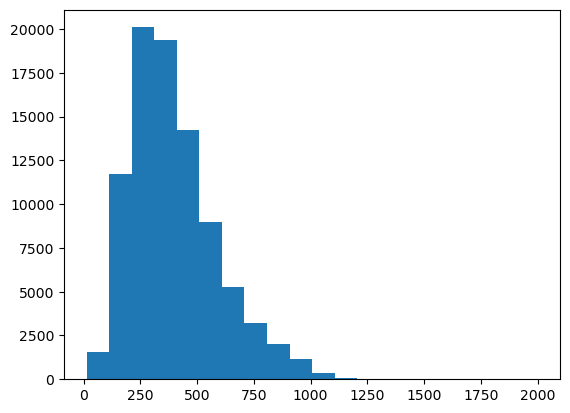

In [36]:
# Distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20);

In [37]:
# How long a sentence length cover 95% of example
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

777

In [38]:
# Max sequence length  in training set
max(sent_lens)

2000

In [39]:
val_x=test_x

In [40]:
train_tokenizer=Tokenizer(num_words=t_max_features)
train_tokenizer.fit_on_texts(list(train_x))
train_x=train_tokenizer.texts_to_sequences(train_x)
val_x=train_tokenizer.texts_to_sequences(val_x)

In [41]:
#how long is each sentence on average?
sent_lens=[len(sentence.split()) for sentence in test_x]
avg_sent_len=np.mean(sent_lens)
print(f"Average Sentence length in validation set:{avg_sent_len}\n")

# How long a sentence length cover 95% of example
output_seq_len_val=int(np.percentile(sent_lens,95))
output_seq_len_val+=20

Average Sentence length in validation set:398.5230909090909



In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_x=pad_sequences(train_x,maxlen=output_seq_len,padding="post")

val_x=pad_sequences(val_x,maxlen=output_seq_len,padding="post")

## Text Summary visualization

In [43]:
#how long is each sentence on average?
sent_lens=[len(sentence.split()) for sentence in train_y]
avg_sent_len=np.mean(sent_lens)
avg_sent_len

51.53154545454545

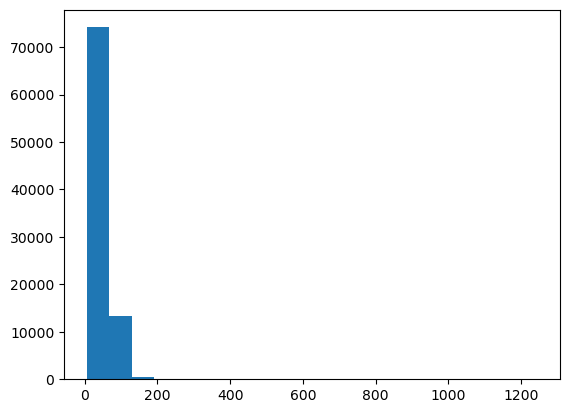

In [44]:
# Distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20);

In [45]:
# How long a sentence length cover 95% of example
output_seq_len_summary=int(np.percentile(sent_lens,95))
output_seq_len_summary
maxlen_summ=output_seq_len_summary
maxlen_summ+=61
print(maxlen_summ)

150


In [46]:
val_y = test_y
s_tokenizer = Tokenizer(num_words=s_max_features)
s_tokenizer.fit_on_texts(list(train_y))
train_y = s_tokenizer.texts_to_sequences(train_y)
val_y = s_tokenizer.texts_to_sequences(val_y)

train_y = pad_sequences(train_y, maxlen=maxlen_summ, padding='post')
val_y = pad_sequences(val_y, maxlen=maxlen_summ, padding='post')

In [47]:
print("Training Sequence", train_x.shape)
print('Target Values Shape', train_y.shape)
print('Test Sequence', val_x.shape)
print('Target Test Shape', val_y.shape)

Training Sequence (88000, 777)
Target Values Shape (88000, 150)
Test Sequence (22000, 777)
Target Test Shape (22000, 150)


## Pretrained Embedding using Glove

In [48]:
embedding_index={}

embed_dim=100

with open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt') as f:
    for line in f:
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:],dtype="float32")
        embedding_index[word]=coefs
        

t_embed = np.zeros((t_max_features, embed_dim)): Creates a NumPy array t_embed with dimensions (t_max_features, embed_dim), where t_max_features is the maximum number of words in the tokenizer's word index, and embed_dim is the dimensionality of the word embeddings. The array is initialized with all zeros.

for word, i in t_tokenizer.word_index.items():: Iterates over each word and its corresponding index (i) in the word_index dictionary of the t_tokenizer tokenizer.

vec = embeding_index.get(word): Retrieves the pre-trained word embedding from the embeding_index dictionary using the current word as the key. The get() method is used to retrieve the value associated with the key, which is the word embedding coefficients, if it exists in the dictionary. If the word is not found in the embeding_index dictionary, vec will be set to None.

if i < t_max_features and vec is not None:: Checks if the current index (i) is less than t_max_features (i.e., within the bounds of the embedding matrix) and if the vec is not None, indicating that a pre-trained word embedding was found for the current word.

t_embed[i] = vec: Assigns the word embedding coefficients (vec) to the corresponding row in the embedding matrix t_embed at index i. This effectively initializes the embedding matrix with the pre-trained word embeddings for the words present in the tokenizer's word index.

In [49]:
training_embed=np.zeros((t_max_features,embed_dim))

for word , i in train_tokenizer.word_index.items():
    vec=embedding_index.get(word)
    if i<t_max_features and vec is not None:
        training_embed[i]=vec

In [50]:
s_embed = np.zeros((s_max_features, embed_dim))
for word, i in s_tokenizer.word_index.items():
    vec = embedding_index.get(word)
    if i < s_max_features and vec is not None:
        s_embed[i] = vec

## Model Architecture

In [51]:
!pip install rogue
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Input, Embedding, Concatenate, TimeDistributed, Bidirectional, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model


  Preparing metadata (setup.py) ... done
  Created wheel for rogue: filename=rogue-0.0.2-py3-none-any.whl size=7231 sha256=dbd0b09bbbb7204ffa37a3ebe352b0352342a60613a869feafbb48e41fad63c7
  Stored in directory: /root/.cache/pip/wheels/d6/b4/6e/f1ce188f272468ce3b1fb57550ccfebf891ff79a41dc4d4e2a
Successfully built rogue


In [52]:
maxlen_text=output_seq_len

In [53]:
latent_dim = 128
# Encoder
enc_input = Input(shape=(maxlen_text, ))
enc_embed = Embedding(t_max_features, embed_dim, input_length=maxlen_text, weights=[training_embed], trainable=False)(enc_input)
enc_lstm = Bidirectional(LSTM(latent_dim, return_state=True))
enc_output, enc_fh, enc_fc, enc_bh, enc_bc = enc_lstm(enc_embed)
enc_h = Concatenate(axis=-1, name='enc_h')([enc_fh, enc_bh])
enc_c = Concatenate(axis=-1, name='enc_c')([enc_fc, enc_bc])
#Decoder
dec_input = Input(shape=(None, ))
dec_embed = Embedding(s_max_features, embed_dim, weights=[s_embed], trainable=False)(dec_input)
dec_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
dec_outputs, _, _ = dec_lstm(dec_embed, initial_state=[enc_h, enc_c])

dec_dense = TimeDistributed(Dense(s_max_features, activation='softmax'))
dec_output = dec_dense(dec_outputs)

model = Model([enc_input, dec_input], dec_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 777)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 777, 100)     12607700    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 bidirectional (Bidirectional)  [(None, 256),        234496      ['embedding[0][0]']              
                                 (None, 128),                                                 

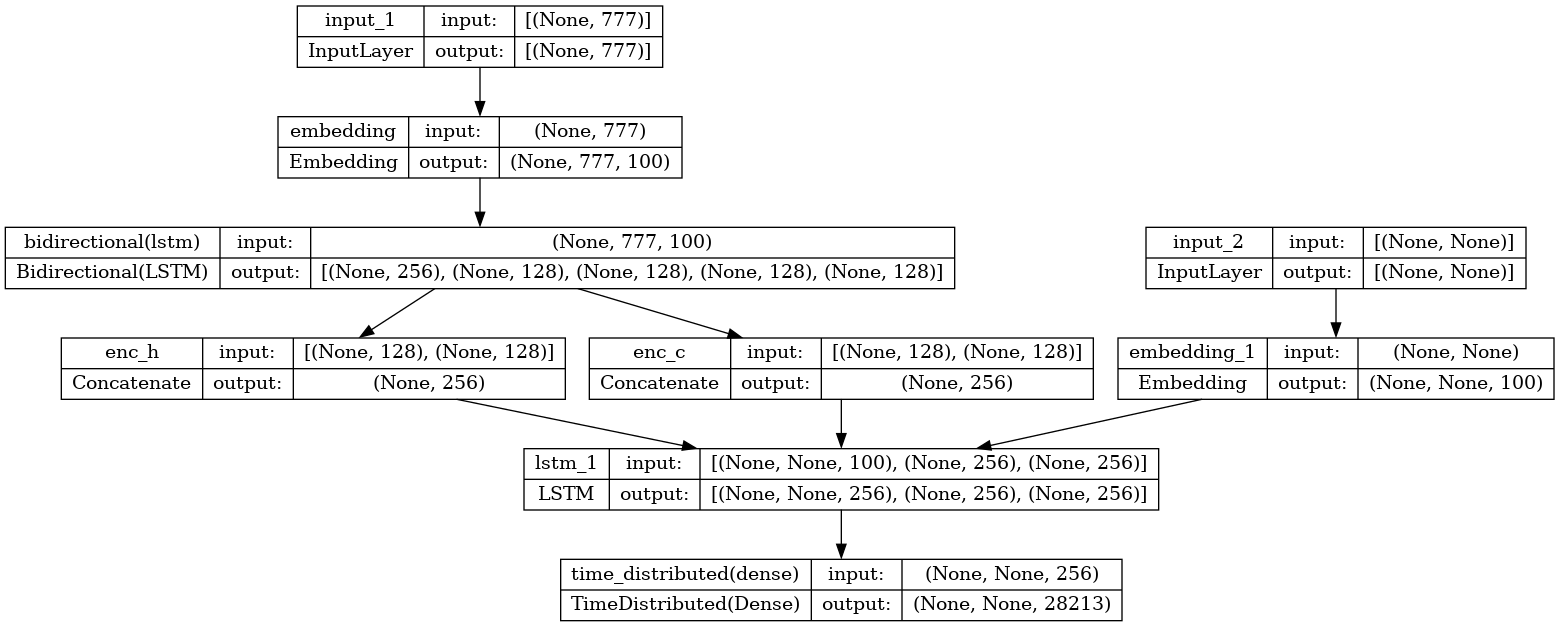

In [54]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [55]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adam",
              metrics=["accuracy"]
             )

In [51]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history_1=model.fit([train_x, train_y[:, :-1]], train_y.reshape(train_y.shape[0], train_y.shape[1], 1)[:, 1:], epochs=7, callbacks=[early_stop], batch_size=128, verbose=1, validation_data=([val_x, val_y[:, :-1]], val_y.reshape(val_y.shape[0], val_y.shape[1], 1)[:, 1:]))


Epoch 1/20
688/688 [==============================] - 1060s 2s/step - loss: 2.6436 - accuracy: 0.6837 - val_loss: 2.2647 - val_accuracy: 0.6982
Epoch 2/20
688/688 [==============================] - 1045s 2s/step - loss: 2.2053 - accuracy: 0.6992 - val_loss: 2.0942 - val_accuracy: 0.7060
Epoch 3/20
688/688 [==============================] - 1047s 2s/step - loss: 2.0822 - accuracy: 0.7045 - val_loss: 2.0024 - val_accuracy: 0.7108
Epoch 4/20
688/688 [==============================] - 1032s 2s/step - loss: 1.9982 - accuracy: 0.7084 - val_loss: 1.9348 - val_accuracy: 0.7144
Epoch 5/20
688/688 [==============================] - 1042s 2s/step - loss: 1.9343 - accuracy: 0.7114 - val_loss: 1.8908 - val_accuracy: 0.7170
Epoch 6/20
688/688 [==============================] - 1042s 2s/step - loss: 1.8872 - accuracy: 0.7138 - val_loss: 1.8585 - val_accuracy: 0.7192
Epoch 7/20
688/688 [==============================] - 1040s 2s/step - loss: 1.8505 - accuracy: 0.7157 - val_loss: 1.8338 - val_accuracy:

## Checking model working

In [57]:
enc_model = Model(inputs=enc_input, outputs=[enc_h, enc_c])

dec_init_state_h = Input(shape=(latent_dim*2, ))
dec_init_state_c = Input(shape=(latent_dim*2, ))

dec_out, dec_h, dec_c = dec_lstm(dec_embed, initial_state=[dec_init_state_h, dec_init_state_c])
dec_final = dec_dense(dec_out)

dec_model = Model([dec_input]+[dec_init_state_h, dec_init_state_c], [dec_final]+[dec_h, dec_c])

In [58]:
import pickle

# Save encoder model
enc_model.save('./encoder_model.h5')

# Save decoder model
dec_model.save('./decoder_model.h5')

# Save tokenizer
with open('./s_tokenizer.pkl', 'wb') as f:
    pickle.dump(s_tokenizer, f)

In [59]:
def generate_summary(input_seq):
    h, c = enc_model.predict(input_seq)
    
    next_token = np.zeros((1, 1))
    next_token[0, 0] = s_tokenizer.word_index['sostok']
    output_seq = ''
    
    stop = False
    count = 0
    
    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])
        
        if token_idx == s_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != s_tokenizer.word_index['sostok']:
            token = s_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token
        
        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1
        
    return output_seq

In [62]:
test_inputs = [clean_data(sent,remove_stopwords=True) for sent in test_data.article]
test_inputs = train_tokenizer.texts_to_sequences(list(test_inputs))
test_inputs = pad_sequences(test_inputs, maxlen=maxlen_text, padding='post')

In [70]:
import csv
hyps = []
with open('./result.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Article', 'Original Summary', 'Model Output'])
    for i in range(10):
        our_summ = generate_summary(test_inputs[i].reshape(1, maxlen_text))
        hyps.append(our_summ)
        writer.writerow([test_data.article[i], test_data.highlights[i], our_summ])

1/1 [==============================] - 0s 22ms/step


In [68]:
import tensorflow as tf
import numpy as np
import pickle

def generate2_summary2(input_text):
    # Load the tokenizer
    with open('./s_tokenizer.pkl', 'rb') as f:
        s_tokenizer = pickle.load(f)
    
    # Load the model
    enc_model = tf.keras.models.load_model('./encoder_model.h5')
    dec_model = tf.keras.models.load_model('./decoder_model.h5')
    
    # Tokenize the input text
    input_seq = s_tokenizer.texts_to_sequences([input_text])
    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, maxlen=maxlen_text, padding='post')
    
    # Generate the summary
    h, c = enc_model.predict(input_seq)
    
    next_token = np.zeros((1, 1))
    next_token[0, 0] = s_tokenizer.word_index['sostok']
    output_seq = ''
    
    stop = False
    count = 0
    
    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])
        
        if token_idx == s_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != s_tokenizer.word_index['sostok']:
            token = s_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token
        
        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1
        
    return output_seq.strip()

In [69]:
text="Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee.Â 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for space in the overhead lockers, crashing elbows and seat back kicking? Tests conducted by the FAA use planes with a 31 inch pitch, a standard which on some airlines has decreased . Many economy seats on United Airlines have 30 inches of room, while some airlines offer as little as 28 inches . Cynthia Corbertt, a human factors researcher with the Federal Aviation Administration, that it conducts tests on how quickly passengers can leave a plane. But these tests are conducted using planes with 31 inches between each row of seats, a standard which on some airlines has decreased, reported the Detroit News. The distance between two seats from one point on a seat to the same point on the seat behind it is known as the pitch. While most airlines stick to a pitch of 31 inches or above, some fall below this. While United Airlines has 30 inches of space, Gulf Air economy seats have between 29 and 32 inches, Air Asia offers 29 inches and Spirit Airlines offers just 28 inches. British Airways has a seat pitch of 31 inches, while easyJet has 29 inches, Thomson's short haul seat pitch is 28 inches, and Virgin Atlantic's is 30-31."
get_sum_for_text = generate2_summary2(text)
print(get_sum_for_text)

1/1 [==============================] - 0s 22ms/step
muniz duel disgust 136 blow government’s government’s government’s government’s government’s government’s representation rewarding wax lehman 20ft 20ft lehman minds receipts lehman antonio scotsman baton scotsman suzuki subsidy twiggy compulsion monks stamps davila davila moroccan creams creams halle ge net kent moose consultations bibles kent glory glory servant 7th glory link snooze breathalyser breathalyser breathalyser gibney gotham natalie handgun detroit stegen animation kiad kiad kiad kiad kiad kiad stave surrogates robust gazprom vermaelen yeti waldorf ancient ancient imprisonment resisting lobbyists hq connections caroline bohn flees patriotism linger whispered accepting bellini throttling crops humorous 58 veggie puppies umbilical £400million £400million puppies backbone prone
